In [8]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

df.head()


Saving student_data.csv to student_data (1).csv


,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


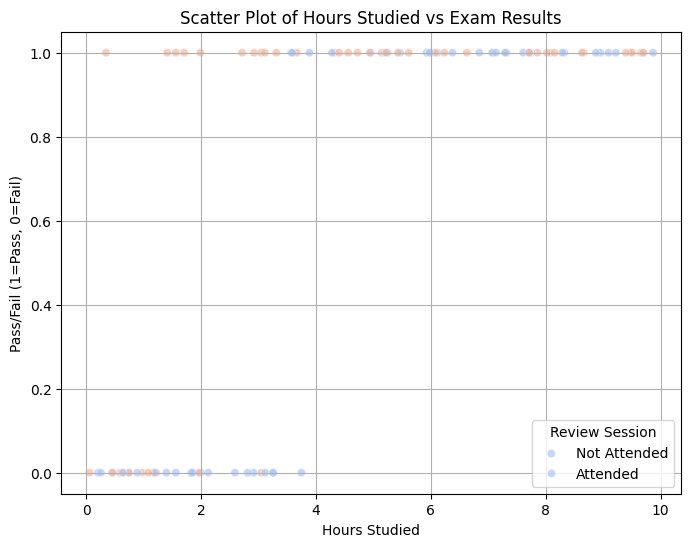

Intercept (β₀): -4.614
Coefficient for Hours_Studied (β₁): 1.365
Coefficient for Review_Session (β₂): 1.878
Model Accuracy: 0.93
AUC-ROC Score: 0.976


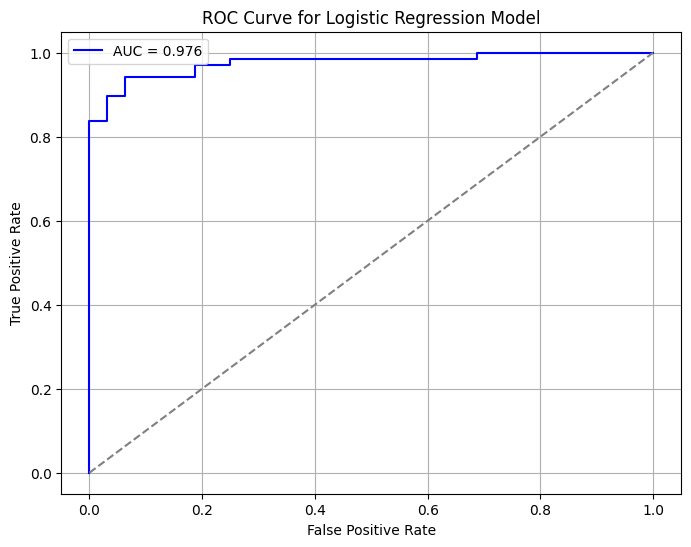

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve



# Define features (Hours_Studied, Review_Session) and target variable (Results)
X = df[["Hours_Studied", "Review_Session"]]
y = df["Results"]

# --- Step 1: Visualizing the Data ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Hours_Studied"], y=df["Results"], hue=df["Review_Session"], alpha=0.7, palette="coolwarm")
plt.xlabel("Hours Studied")
plt.ylabel("Pass/Fail (1=Pass, 0=Fail)")
plt.title("Scatter Plot of Hours Studied vs Exam Results")
plt.legend(title="Review Session", labels=["Not Attended", "Attended"])
plt.grid()
plt.show()

# --- Step 2: Fitting a Logistic Regression Model ---
log_reg = LogisticRegression()
log_reg.fit(X, y)

# --- Step 3: Making Predictions ---
y_pred = log_reg.predict(X)
y_prob = log_reg.predict_proba(X)[:, 1]  # Get probability of passing

# --- Step 4: Extracting Model Coefficients and Performance Metrics ---
intercept = log_reg.intercept_[0]
coefficients = log_reg.coef_[0]
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)

# Print Model Results
print(f"Intercept (β₀): {intercept:.3f}")
print(f"Coefficient for Hours_Studied (β₁): {coefficients[0]:.3f}")
print(f"Coefficient for Review_Session (β₂): {coefficients[1]:.3f}")
print(f"Model Accuracy: {accuracy:.2f}")
print(f"AUC-ROC Score: {auc:.3f}")

# --- Step 5: Plotting the ROC Curve ---
fpr, tpr, _ = roc_curve(y, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend()
plt.grid()
plt.show()
